<a href="https://colab.research.google.com/github/jmmarinr/ComputationalMethods/blob/master/Interpolacion/Actividad05_Interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d
import sympy as sp
sp.init_printing()
import pandas as pd
import urllib.request

# Actividad 05: Interpolación

---
### Profesor: Juan Marcos Marín
### Nombre: Santiago Silva
*Métodos computacionales 2025-I*

---

# 1
Supongamos que queremos interpolar la función  $f(x)=\sin(x)$  usando los puntos  $x_0=0$ ,  $x_1=\pi/2$ , y  $x_2=\pi$.

Encuentre el polinomio de interpolación de Lagrange y el error asociado al misma. Recuerde que el error de interpolación de Lagrange puede expresarse explícitamente como:

\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}

Donde:
- $f^{(n+1)}(\xi)$ es la derivada de orden $n$ de la función $f(x)$ evaluada en algún punto $\xi$ en el intervalo de interpolación.

- Repita el numeral anterior, pero para los polinomios de interpolación de Hermite, conociendo que:


$$
f(x) - P(x) = \epsilon = \frac{f^{(2n+2)}(\xi)}{(2n+2)!} \prod_{i=0}^{n} (x - x_i)^2
$$

*Nota: recuerde que los indices en python inician en 0, luego si tenemos $n+1$ datos el polinomio es de orden $n$*

Polinomio de Lagrange:
x⋅(1.27323954473516 - 0.405284734569351⋅x)
Error teórico de Lagrange:
-x⋅(x - 3.14159265358979)⋅(x - 1.5707963267949)⋅sin(ξ) 
───────────────────────────────────────────────────────
                           6                           
Polinomio de Hermite:
  ⎛                   5                   4                     3              ↪
x⋅⎝0.266281337163738⋅x  - 2.509642477865⋅x  + 8.57654681423952⋅x  - 12.6060688 ↪

↪         2                           ⎞
↪ 550723⋅x  + 6.51414526046807⋅x + 1.0⎠
Error teórico de Hermite:
                    2                          2                          2    ↪
0.0338226010534731⋅x ⋅(0.318309886183791⋅x - 1) ⋅(0.636619772367581⋅x - 1) ⋅si ↪

↪     
↪ n(ξ)


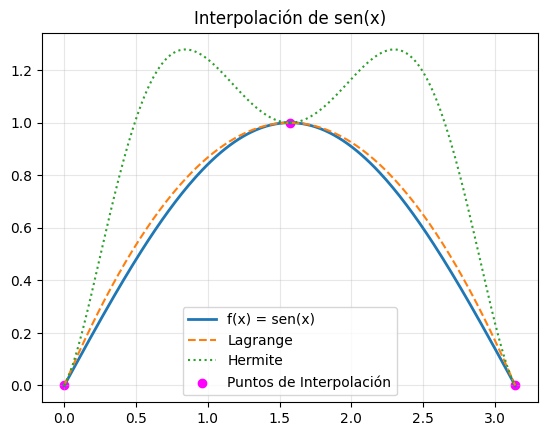

In [10]:
x_vals = [0, np.pi/2, np.pi] #x0, x1, x2
y_vals = [np.sin(x) for x in x_vals] #f(x) = senx

x = sp.Symbol('x')

def lagrange_polin(x_vals, y_vals):

    n = len(x_vals)
    P = 0
    for i in range(n):

        L_i = 1 #polinomio base
        for j in range(n):

            if i != j:
                L_i *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        P += y_vals[i] * L_i
    return sp.simplify(P)

P_lagrange = lagrange_polin(x_vals, y_vals)
print("Polinomio de Lagrange:")
sp.pprint(P_lagrange)

#error de lagrange
xi = sp.Symbol('xi')
error_lagrange = (-sp.sin(xi) / sp.factorial(3)) * (x - x_vals[0]) * (x - x_vals[1]) * (x - x_vals[2])
print("Error teórico de Lagrange:")
sp.pprint(sp.simplify(error_lagrange))

#hermite
f_prime = [np.cos(x) for x in x_vals]


def hermite_polin(x_vals, y_vals, f_prime):

    n = len(x_vals)
    H = 0  # Polinomio Hermite
    for i in range(n):
        xi = x_vals[i]
        yi = y_vals[i]
        dpi = f_prime[i]


        Li = 1 #polinomio base
        for j in range(n):

            if i != j:
                Li *= (x - x_vals[j]) / (xi - x_vals[j])

        Li = sp.simplify(Li)
        Li_deriv = sp.diff(Li, x)

        h_i = (1 - 2*(x - xi)*Li_deriv) * (Li**2)
        h_i_prime = (x - xi)*(Li**2)

        H += yi*h_i + dpi*h_i_prime

    return sp.simplify(H)

P_hermite = hermite_polin(x_vals, y_vals, f_prime)
print("Polinomio de Hermite:")
sp.pprint(P_hermite)

#error para hermite
n = len(x_vals)
error_hermite = (sp.sin(xi) / sp.factorial(2*n))
product_term = 1

for i in range(n):

    product_term *= (x - x_vals[i])**2
error_hermite *= product_term

print("Error teórico de Hermite:")
sp.pprint(sp.simplify(error_hermite))

#comparacion visual por medio de un grafico
f_real = sp.lambdify(x, sp.sin(x), 'numpy')
f_lagrange = sp.lambdify(x, P_lagrange, 'numpy')
f_hermite = sp.lambdify(x, P_hermite, 'numpy')

x_plot = np.linspace(0, np.pi, 200)
plt.plot(x_plot, f_real(x_plot), label='f(x) = sen(x)', linewidth=2)
plt.plot(x_plot, f_lagrange(x_plot), '--', label='Lagrange')
plt.plot(x_plot, f_hermite(x_plot), ':', label='Hermite')
plt.scatter(x_vals, y_vals, color='magenta', label='Puntos de Interpolación')
plt.title("Interpolación de sen(x)")
plt.legend()
plt.grid(True, alpha = 0.3)


# 2

En física nuclear se calcula la sección eficaz de dispersión (scattering cross section) a partir de experimentos de colisiones, se sabe a partir de la teoría que la sección eficaz se describe por la formula de Breit-Wigner,

$$\sigma(E)=\frac{\sigma_0}{(E-E_r)^2+\frac{\Gamma^2}{4}}$$

donde $E$ es la energía y $E_r,\sigma_0, \Gamma$ son parámetros a ajustar; el valor predicho es $(E_r,\Gamma) = (78, 55)$ MeV; donde $\sigma_0$ se puede calcular ahora a partir de la fórmula simplemente remplazando cualquier par de puntos de la tabla.

A partir de los valores de energía,


```
Energia  = np.array([0   , 25  , 50  , 75  , 100 , 125 , 150 , 175 , 200])
sigma_exp= np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])

```

* Calcule los polinomios de Lagrange, Newton y Hermite.

* Haga un gráfico de los polinomios junto con la función original.

* Finalmente, a partir de la diferencia $|f(x) - P_n(x)|$ calcule el máximo   error asociado a cada uno de ellos. ¿Cuál será el mejor?

Máximo error Lagrange: 4.0021912027138455
Máximo error Newton: 4.002191202722486
Máximo error Hermite: 2991411512399.8403


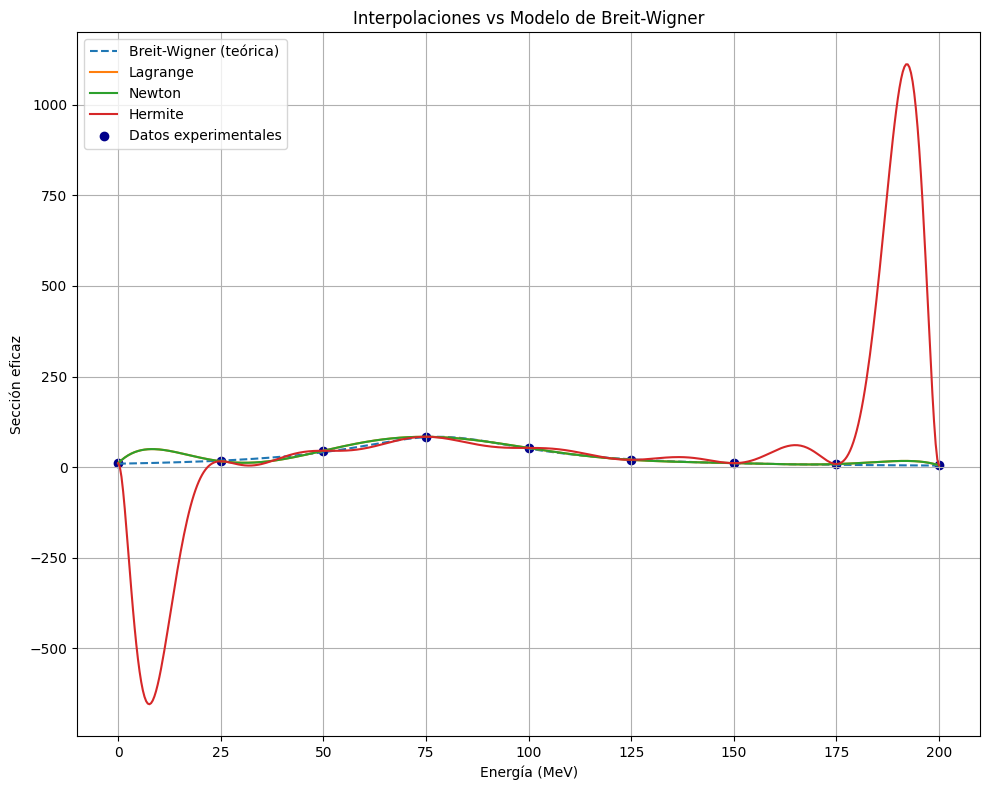

In [14]:
Energia = np.array([0, 25, 50, 75, 100, 125, 150, 175, 200])
sigma_exp = np.array([10.6, 16.0, 45.0, 83.5, 52.8, 19.9, 10.8, 8.25, 4.7])
#parametros
E_r = 78
Gamma = 55
sigma0 = max(sigma_exp) * (Gamma**2 / 4)

def sigma_t(E):

    return sigma0 / ((E - E_r)**2 + (Gamma**2 / 4))

x = sp.Symbol('x')

#lagrange
def lagrange_polin(x_vals, y_vals):

    n = len(x_vals)
    return sp.simplify(sum(
        y_vals[i] * sp.prod([(x - x_vals[j]) / (x_vals[i] - x_vals[j]) for j in range(n) if j != i])
        for i in range(n)
    ))

#newton
def newton_polin(x_vals, y_vals):

    n = len(x_vals)
    coef = np.copy(y_vals)
    for j in range(1, n):

        coef[j:] = (coef[j:] - coef[j-1:-1]) / (x_vals[j:] - x_vals[:n-j])
    poly = coef[0]
    term = 1
    for i in range(1, n):

        term *= (x - x_vals[i-1])
        poly += coef[i] * term
    return sp.simplify(poly)

#hermite
def hermite_polin(x_vals, y_vals):

    n = len(x_vals)
    z = np.repeat(x_vals, 2)
    Q = np.zeros((2*n, 2*n))
    Q[:, 0] = np.repeat(y_vals, 2)
    for i in range(1, 2*n):

        for j in range(1, i+1):

            if z[i] == z[i-j]:

                Q[i][j] = 0
            else:
                Q[i][j] = (Q[i][j-1] - Q[i-1][j-1]) / (z[i] - z[i-j])
    H = Q[0][0]
    term = 1
    for i in range(1, 2*n):

        term *= (x - z[i-1])
        H += Q[i][i] * term
    return sp.simplify(H)


P_lagrange = lagrange_polin(Energia, sigma_exp)
P_newton = newton_polin(Energia, sigma_exp)
P_hermite = hermite_polin(Energia, sigma_exp)

#convertir a funciones numéricas
f_lagrange = sp.lambdify(x, P_lagrange, 'numpy')
f_newton = sp.lambdify(x, P_newton, 'numpy')
f_hermite = sp.lambdify(x, P_hermite, 'numpy')

E_plot = np.linspace(0, 200, 500)
#graficamos
plt.figure(figsize=(10,8))
plt.plot(E_plot, sigma_t(E_plot), '--', label = 'Breit-Wigner (teórica)')
plt.plot(E_plot, f_lagrange(E_plot), label = 'Lagrange')
plt.plot(E_plot, f_newton(E_plot), label = 'Newton')
plt.plot(E_plot, f_hermite(E_plot), label = 'Hermite')
plt.scatter(Energia, sigma_exp, color = 'darkblue', label = 'Datos experimentales')
plt.xlabel('Energía (MeV)')
plt.ylabel('Sección eficaz')
plt.title('Interpolaciones vs Modelo de Breit-Wigner')
plt.legend()
plt.grid(True)
plt.tight_layout()


sigma_real = sigma_t(Energia)
err_lagrange = np.abs(sigma_real - f_lagrange(Energia))
err_newton = np.abs(sigma_real - f_newton(Energia))
err_hermite = np.abs(sigma_real - f_hermite(Energia))

print("Máximo error Lagrange:", np.max(err_lagrange))
print("Máximo error Newton:", np.max(err_newton))
print("Máximo error Hermite:", np.max(err_hermite))


# 3
Consideremos la función:
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

* Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$.
* Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de `sympy` y encuente el error en la interpolación. La cota del  error , viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation},

emplee la libreria simbólica para realizar la estimación de dicha cuota, sólo para $n = 4$, en el punto $x=0.5$.

* Repita la parte inicial para el conjunto de $p_n(x)$ con $n=\{ 4, 8, 12, 16, 20 \}$, usando la interpolación de Hermite, ¿existe alguna diferencia?

* Usando los datos del numeral anterior ahora usando el método `CubicSpline` realiza la interpolación y concluya.

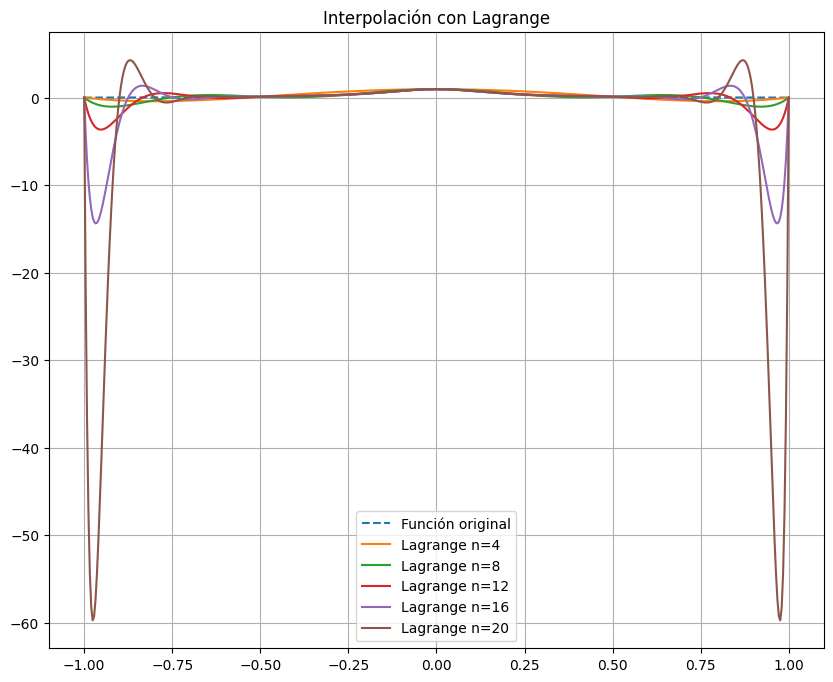

Cota teórica del error (n=4, x=0.5): 0


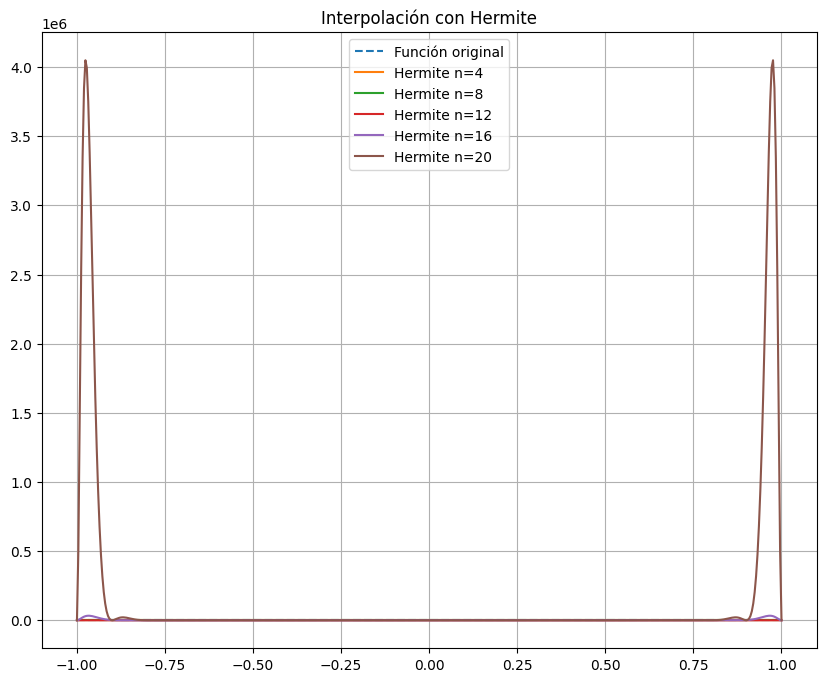

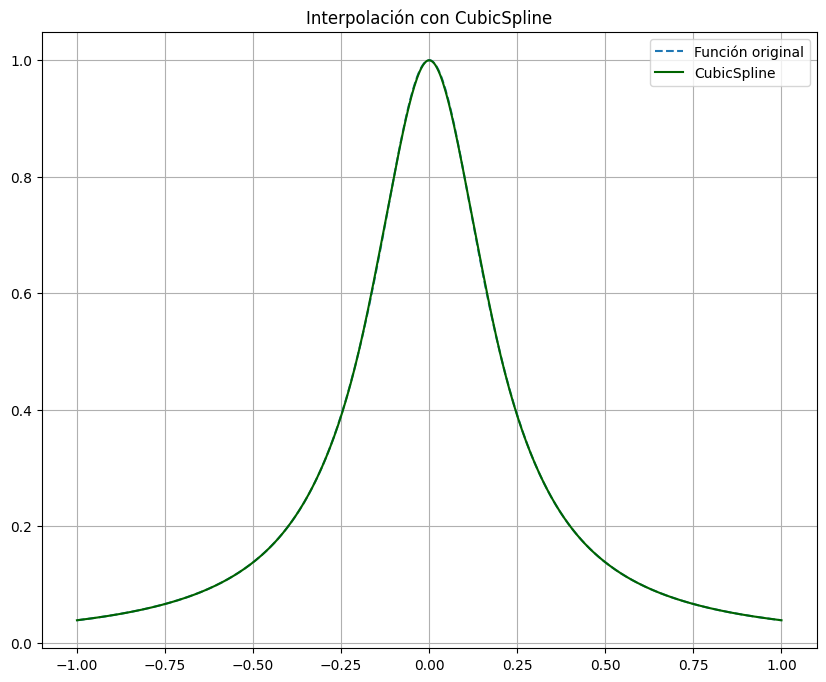

Error máximo CubicSpline: 0.0031813083148618526


In [18]:
f = lambda x: 1 / (1 + 25 * x**2)
x_sym = sp.Symbol('x')
f_sym = 1 / (1 + 25 * x_sym**2)

n_vals = [4, 8, 12, 16, 20]
x_eval = np.linspace(-1, 1, 500)

def lagrange_polin(xn, yn):

    x = sp.Symbol('x')
    n = len(xn)
    P = sum(yn[i] * sp.prod([(x - xn[j]) / (xn[i] - xn[j]) for j in range(n) if j != i]) for i in range(n))
    return sp.simplify(P)

def hermite_polin(x_vals, y_vals):

    x = sp.Symbol('x')
    n = len(x_vals)
    z = np.repeat(x_vals, 2)
    Q = np.zeros((2*n, 2*n))
    Q[:, 0] = np.repeat(y_vals, 2)
    for i in range(1, 2*n):

        for j in range(1, i+1):

            if z[i] == z[i-j]:

                Q[i][j] = 0
            else:

                Q[i][j] = (Q[i][j-1] - Q[i-1][j-1]) / (z[i] - z[i-j])
    H = Q[0][0]
    term = 1
    for i in range(1, 2*n):

        term *= (x - z[i-1])
        H += Q[i][i] * term
    return sp.simplify(H)


def plot_error(n, method='lagrange'):

    x_nodes = np.linspace(-1, 1, n+1)
    y_nodes = f(x_nodes)

    if method == 'lagrange':

        P = lagrange_polin(x_nodes, y_nodes)
    elif method == 'hermite':

        P = hermite_polin(x_nodes, y_nodes)

    P_func = sp.lambdify(x_sym, P, 'numpy')
    y_interp = P_func(x_eval)
    y_true = f(x_eval)

    max_error = np.max(np.abs(y_true - y_interp))
    plt.plot(x_eval, y_interp, label=f'{method.capitalize()} n={n}')
    return max_error, P

#lagrange
plt.figure(figsize=(10, 8))
plt.plot(x_eval, f(x_eval), '--', label='Función original')


errores_lagrange = []
for n in n_vals:

    err, _ = plot_error(n, method='lagrange')
    errores_lagrange.append(err)

plt.legend()
plt.title('Interpolación con Lagrange')
plt.grid(True)
plt.show()

#estimacion cota teórica del error para n=4 en x=0.5
n = 4
x_nodes = np.linspace(-1, 1, n+1)
P4 = lagrange_polin(x_nodes, f(x_nodes))
f5 = sp.diff(f_sym, x_sym, 5)
max_f5 = sp.lambdify(x_sym, sp.Abs(f5), 'numpy')
cota_error = (1 / sp.factorial(n+1)) * max_f5(0.5) * np.abs(np.prod([0.5 - xi for xi in x_nodes]))
print(f"Cota teórica del error (n=4, x=0.5): {cota_error}")

#hermite
plt.figure(figsize=(10, 8))
plt.plot(x_eval, f(x_eval), '--', label='Función original')

errors_hermite = []
for n in n_vals:
    err, _ = plot_error(n, method='hermite')
    errors_hermite.append(err)

plt.legend()
plt.title('Interpolación con Hermite')
plt.grid(True)
plt.show()

#cubicline
x_nodes = np.linspace(-1, 1, 21)
y_nodes = f(x_nodes)
cs = CubicSpline(x_nodes, y_nodes)
plt.figure(figsize=(10, 8))
plt.plot(x_eval, f(x_eval), '--', label='Función original')
plt.plot(x_eval, cs(x_eval), 'darkgreen', label='CubicSpline')
plt.legend()
plt.title('Interpolación con CubicSpline')
plt.grid(True)
plt.show()

error_cs = np.max(np.abs(f(x_eval) - cs(x_eval)))
print(f"Error máximo CubicSpline: {error_cs}")


# 4

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).

Ref: Metodos numericos, Burden.


Con los datos dados en la tabla:

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`)

2. Definir una lista de puntos, $x_i$,$y_i$ del pato y realice una interpolación lineal entre los mismos.

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`),


5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

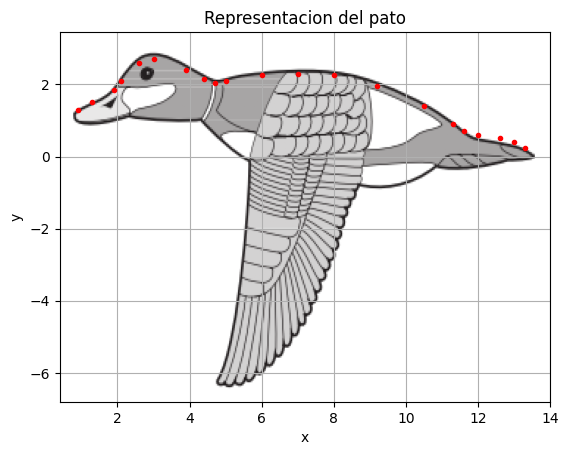

In [32]:
pato = 'https://3.bp.blogspot.com/-8_LTrCIxVSQ/VxU-5Gq2ffI/AAAAAAAAIto/LhCDEwHKTiAbLr7IhizQwGV13YTwgpbDwCLcB/s400/pato1.png' #URL
urllib.request.urlretrieve(pato, 'pato.jpg')# Decargar la imagen
imagen_pato = plt.imread('pato.jpg') # Variable con la imagen del pato

# Definimos los puntos del pato
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0, 6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1, 2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

# Representamos graficamente al pato y los puntos que definimos para su contorno superior
plt.figure()
plt.title('Representacion del pato')
plt.imshow(imagen_pato, extent = (0.4, 14, -6.8, 3.45)) # Ajustamos los pixeles para que coincidan con x e y
plt.plot(xp, yp, '.r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

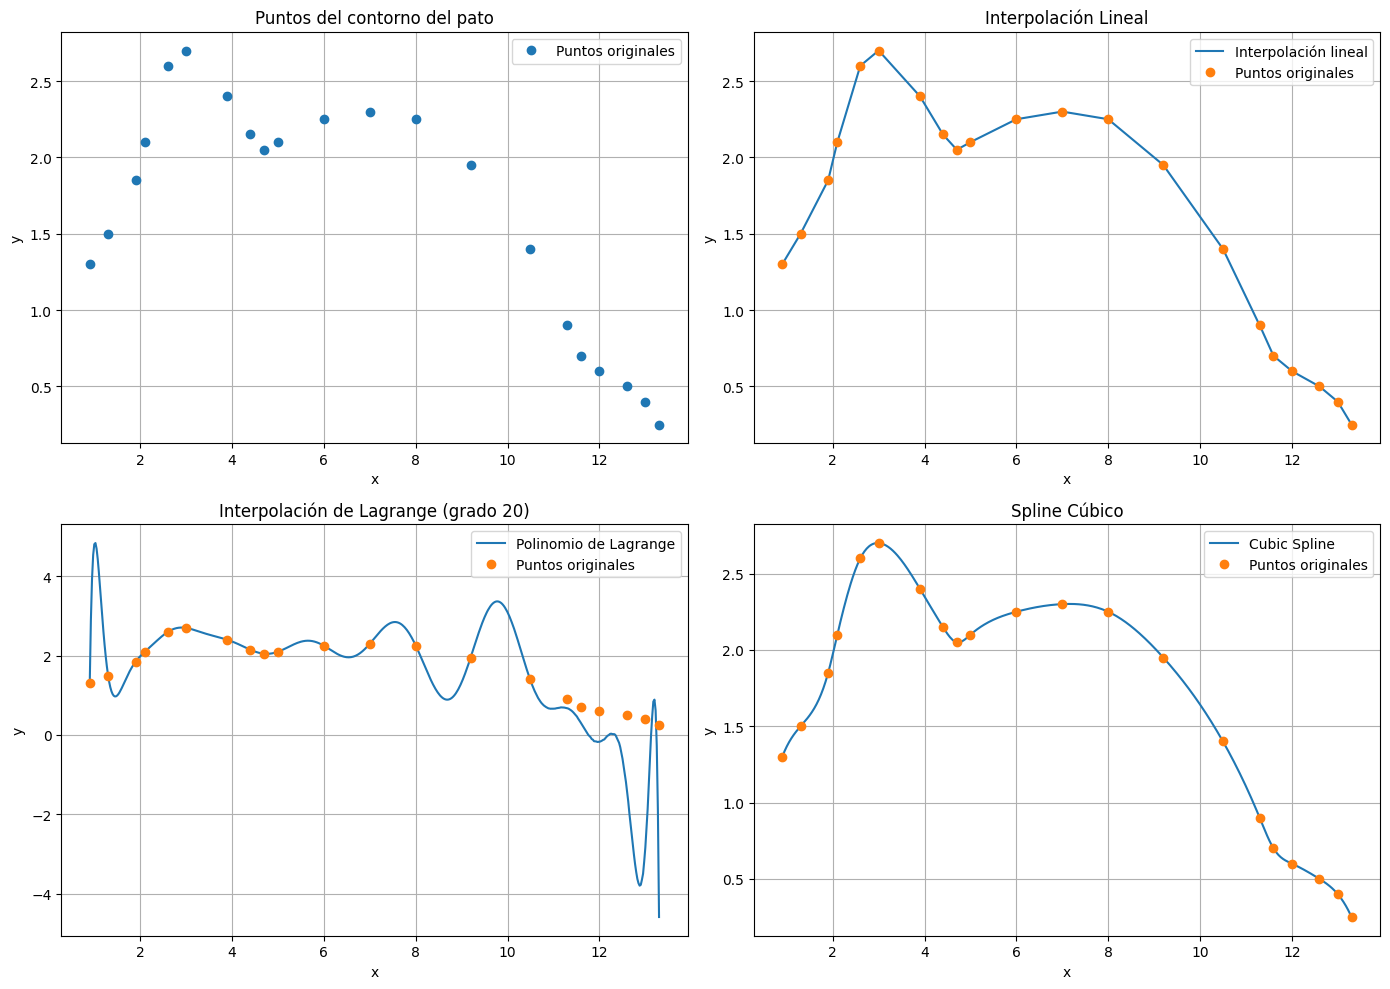

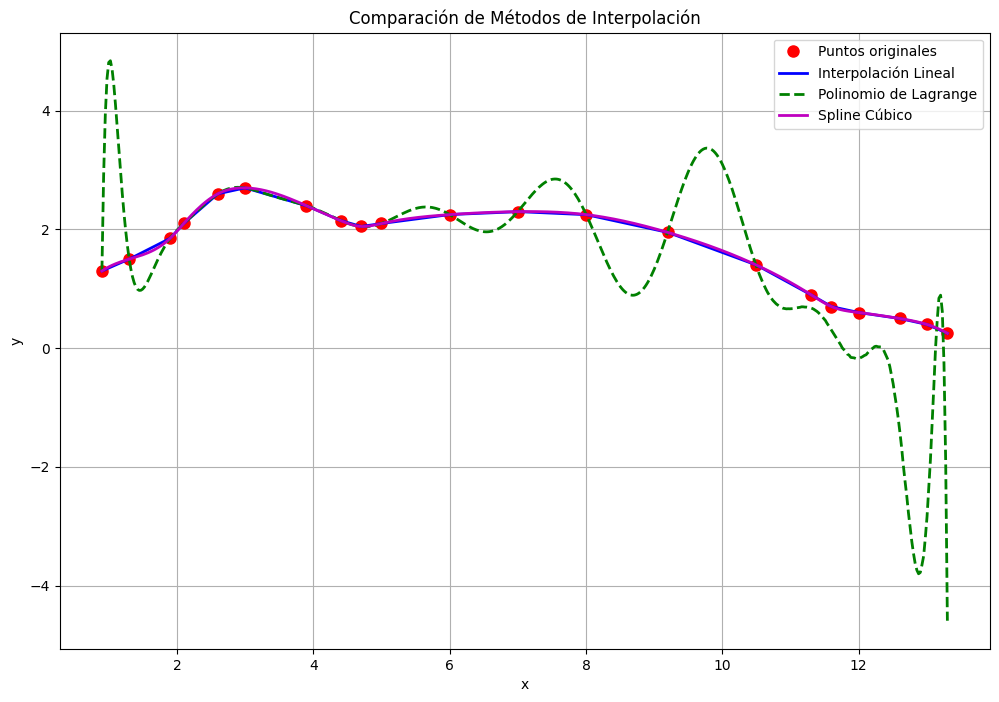

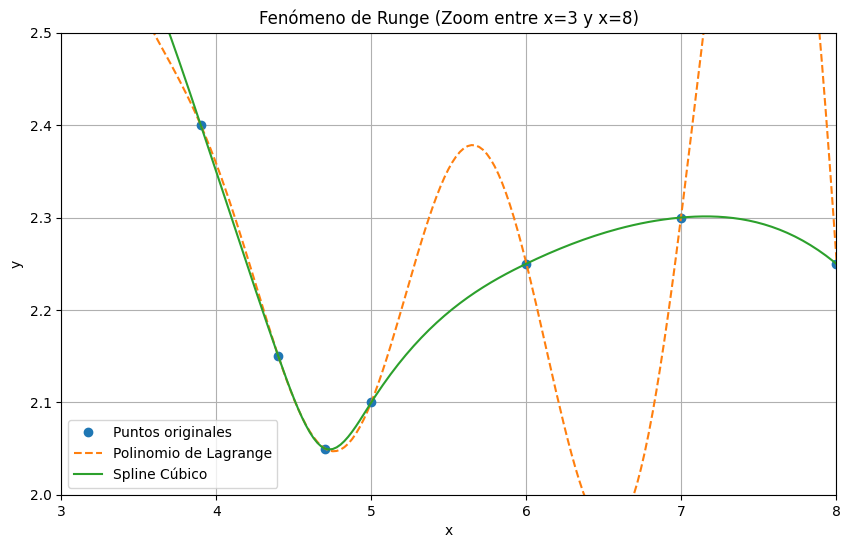

El polinomio de Lagrange muestra fuertes oscilaciones (fenómeno de Runge)
La interpolación lineal y el spline cúbico no presentan oscilaciones significativas
Las oscilaciones en el polinomio de Lagrange se deben a:
Alto grado del polinomio (20 para 21 puntos), Comportamiento inherente de los polinomios de alto grado en intervalos amplios
Sensibilidad a pequeños cambios en puntos con alta densidad (Fenómeno de Runge)
CubicSpline resultó ser la mejor opción


In [35]:
xp = [0.9, 1.3, 1.9, 2.1, 2.6, 3.0, 3.9, 4.4, 4.7, 5.0,
      6.0, 7.0, 8.0, 9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]
yp = [1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 2.1,
      2.25, 2.3, 2.25, 1.95, 1.4, 0.9, 0.7, 0.6, 0.5, 0.4, 0.25]

#interpolación lineal
linear_interp = interp1d(xp, yp, kind='linear')
x_linear = np.linspace(min(xp), max(xp), 500)
y_linear = linear_interp(x_linear)

#Polinomio de Lagrange
poly = lagrange(xp, yp)
x_lagrange = np.linspace(min(xp), max(xp), 500)
y_lagrange = poly(x_lagrange)

#cubic spline
cubic_interp = CubicSpline(xp, yp)
x_cubic = np.linspace(min(xp), max(xp), 500)
y_cubic = cubic_interp(x_cubic)


plt.figure(figsize=(14, 10))
#gráfico de los puntos originales
plt.subplot(2, 2, 1)
plt.plot(xp, yp, 'o', label='Puntos originales')
plt.title('Puntos del contorno del pato')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

#grafico para la interpolación lineal
plt.subplot(2, 2, 2)
plt.plot(x_linear, y_linear, '-', label='Interpolación lineal')
plt.plot(xp, yp, 'o', label='Puntos originales')
plt.title('Interpolación Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

#grafico para la interpolación de Lagrange
plt.subplot(2, 2, 3)
plt.plot(x_lagrange, y_lagrange, '-', label='Polinomio de Lagrange')
plt.plot(xp, yp, 'o', label='Puntos originales')
plt.title('Interpolación de Lagrange (grado 20)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

#cubic spline grafico
plt.subplot(2, 2, 4)
plt.plot(x_cubic, y_cubic, '-', label='Cubic Spline')
plt.plot(xp, yp, 'o', label='Puntos originales')
plt.title('Spline Cúbico')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

#análisis comparativo
plt.figure(figsize=(12, 8))
plt.plot(xp, yp, 'ro', label='Puntos originales', markersize=8)
plt.plot(x_linear, y_linear, 'b-', label='Interpolación Lineal', linewidth=2)
plt.plot(x_lagrange, y_lagrange, 'g--', label='Polinomio de Lagrange', linewidth=2)
plt.plot(x_cubic, y_cubic, 'm-', label='Spline Cúbico', linewidth=2)
plt.title('Comparación de Métodos de Interpolación')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# 7. Análisis de oscilaciones (Zoom en región problemática)
plt.figure(figsize=(10, 6))
plt.plot(xp, yp, 'o', label='Puntos originales')
plt.plot(x_lagrange, y_lagrange, '--', label='Polinomio de Lagrange')
plt.plot(x_cubic, y_cubic, '-', label='Spline Cúbico')
plt.xlim(3, 8)
plt.ylim(2.0, 2.5)
plt.title('Fenómeno de Runge (Zoom entre x=3 y x=8)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

print("El polinomio de Lagrange muestra fuertes oscilaciones (fenómeno de Runge)")
print("La interpolación lineal y el spline cúbico no presentan oscilaciones significativas")

print("Las oscilaciones en el polinomio de Lagrange se deben a:")
print("Alto grado del polinomio (20 para 21 puntos), Comportamiento inherente de los polinomios de alto grado en intervalos amplios")
print("Sensibilidad a pequeños cambios en puntos con alta densidad (Fenómeno de Runge)")
print("CubicSpline resultó ser la mejor opción")

# 5

Calcular el spline cúbico que interpola los puntos $(-1,5)$, $(0,3)$, $(1,3)$, $(2,4)$, para esto escriba la matriz asociada y encuentre los polinomios $S_0(x)$, $S_1(x)$ y $S_2(x)$. Evalue su respuesta para $x= 1.5$ usando `CubicSpline` de `scipy`.

In [24]:
x = np.array([-1, 0, 1, 2])
y = np.array([5, 3, 3, 4])


cs = CubicSpline(x, y, bc_type='natural')
#evaluamos en x = 1.5
result = cs(1.5)
print(f"El valor interpolado en x=1.5 es: {result:.3f}")

#polinomios S0, S1, S2
print("Coeficientes de los polinomios:")
print("S0: [a0, b0, c0, d0] =", cs.c[:,0])
print("S1: [a1, b1, c1, d1] =", cs.c[:,1])
print("S2: [a2, b2, c2, d2] =", cs.c[:,2])

El valor interpolado en x=1.5 es: 3.450
Coeficientes de los polinomios:
S0: [a0, b0, c0, d0] = [ 0.46666667  0.         -2.46666667  5.        ]
S1: [a1, b1, c1, d1] = [-0.33333333  1.4        -1.06666667  3.        ]
S2: [a2, b2, c2, d2] = [-0.13333333  0.4         0.73333333  3.        ]
